# Predicting diabetes status using NHANES

[DSLC stages]: Analysis



First load in the data.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

from functions.load_diabetes_data import load_diabetes_data
# load the diabetes data

train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')
test_2017 = pd.read_csv('test_2017.csv')

pd.set_option('display.max_columns', None)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(test_2017.shape)

(46408, 31)
(5801, 31)
(5801, 31)
(17452, 31)


In [2]:
train_data.head(10)

,house_family_person_id,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,region,marital_status,stroke,told_reduce_fat,weight_loss_program,hours_sleep,blood_sugar,race,angina_pectoris,heart_attack,kidney_weak,functional_limits,arthritis,cannot_afford_medication,diabetes
0,1.743801e+08,62.000000,1.000000,1.000000,0.000000,173.800000,2629.200000,64.000000,1.000000,0.000000,0.000000,1.000000,1.0,3.000000,0.000000,3.200000,2.000000,4.000000,1.0,1.000000,0.0,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0
1,2.310763e+08,68.288483,0.903839,0.000000,1.000000,234.614975,3045.997339,73.519194,0.903839,0.000000,0.096161,0.903839,1.0,1.807678,1.807678,4.519194,1.000000,1.576967,0.0,1.000000,0.0,7.903839,1.000000,0.000000,0.000000,0.096161,0.000000,1.0,1.000000,0.0,1.0
2,4.375801e+08,65.000000,0.000000,1.000000,0.000000,173.400000,2810.400000,65.000000,1.000000,0.000000,0.000000,0.000000,0.0,3.000000,3.000000,7.200000,2.000000,1.000000,0.0,0.000000,0.0,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0
3,3.935827e+08,68.496836,0.000000,1.000000,0.000000,182.503164,3261.221448,62.748418,1.000000,0.625791,0.000000,0.374209,1.0,4.380536,0.000000,20.084665,2.000000,6.251582,0.0,1.000000,0.0,5.000000,1.625791,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.0,1.0
4,1.730101e+06,36.000000,1.000000,0.000000,0.000000,175.000000,2584.000000,69.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,3.000000,1.000000,0.0,0.000000,0.0,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
5,8.522222e+07,63.666099,0.848459,0.000000,0.000000,156.397243,2508.948427,65.757705,1.000000,0.151541,0.000000,1.000000,0.0,5.939213,5.939213,8.484590,2.696918,5.303082,0.0,0.000000,0.0,8.000000,2.212328,0.151541,0.000000,0.000000,0.000000,1.0,0.848459,0.0,1.0
6,7.390101e+06,49.000000,1.000000,1.000000,0.000000,198.000000,2970.000000,67.400000,1.000000,0.000000,0.000000,1.000000,0.0,7.000000,1.000000,3.000000,2.000000,6.000000,0.0,1.000000,1.0,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
7,5.333401e+08,45.000000,1.000000,1.000000,0.000000,110.000000,1949.000000,63.000000,0.000000,0.000000,0.000000,1.000000,0.0,5.000000,5.000000,0.000000,1.000000,5.000000,0.0,0.000000,0.0,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
8,3.085101e+08,74.000000,1.000000,1.000000,0.000000,181.000000,2653.800000,64.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,1.000000,7.000000,0.0,0.000000,0.0,7.400000,2.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0
9,5.661572e+08,68.884681,1.000000,0.485585,0.514415,170.037307,3546.606972,68.114415,1.000000,0.514415,0.000000,1.000000,1.0,0.000000,0.000000,2.971170,0.971170,4.514415,0.0,0.514415,0.0,9.086489,1.000000,0.000000,0.514415,0.514415,0.514415,1.0,0.485585,0.0,1.0


Drop target and identification columns and set up for training and testing

In [3]:
X_test_2017 = test_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_2017 = test_2017['diabetes']

X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test = test_data['diabetes']

X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_train = train_data['diabetes']

X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_val = val_data['diabetes']

In [4]:
X_test_2017.head()

,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,region,marital_status,stroke,told_reduce_fat,weight_loss_program,hours_sleep,blood_sugar,race,angina_pectoris,heart_attack,kidney_weak,functional_limits,arthritis,cannot_afford_medication
0,65.0,1.0,1.0,0.0,155.0,2930.0,61.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,2.0,4.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45.0,1.0,0.0,0.0,240.0,3544.0,69.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,67.0,1.0,1.0,0.0,236.0,4313.0,62.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,12.0,1.0,5.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,1.0,0.0,0.0,182.0,3227.0,63.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,79.0,0.0,1.0,0.0,135.0,2467.0,62.0,0.0,0.0,0.0,1.0,0.0,7.0,7.0,2.0,1.0,5.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Create logistic regression model and test on validation, testing, and 2017 test dataset. Creates reports for each dataset and a confusion matrix for both the test and 2017 test dataset.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Train the logistic regression model
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

VAL
Accuracy: 0.813997586622996
Confusion Matrix:
 [[2221  644]
 [ 435 2501]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.78      0.80      2865
         1.0       0.80      0.85      0.82      2936

    accuracy                           0.81      5801
   macro avg       0.82      0.81      0.81      5801
weighted avg       0.82      0.81      0.81      5801

TEST
Accuracy: 0.8083089122565075
Confusion Matrix:
 [[2241  637]
 [ 475 2448]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      2878
         1.0       0.79      0.84      0.81      2923

    accuracy                           0.81      5801
   macro avg       0.81      0.81      0.81      5801
weighted avg       0.81      0.81      0.81      5801



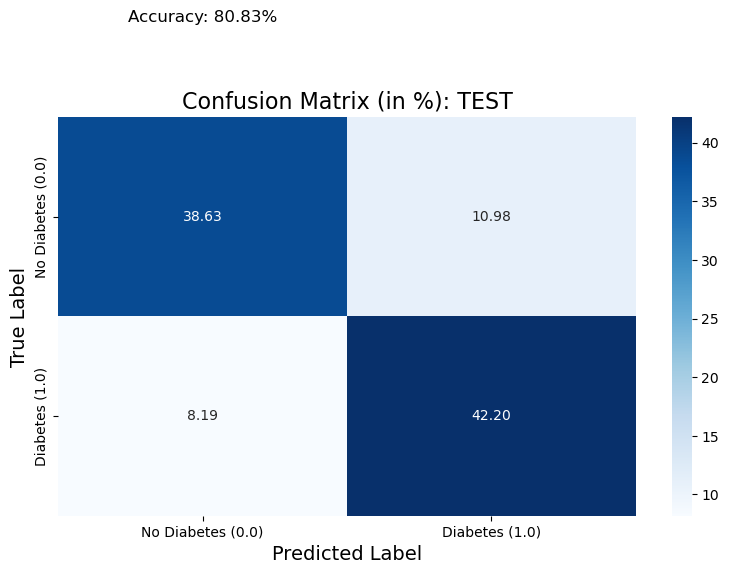

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y_test_pred = model.predict(X_test)

# Calculate confusion matrix and normalize it to percentages
cm_values = confusion_matrix(y_test, y_test_pred) / y_test.shape[0] * 100

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'], 
            yticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Set plot labels and title
plt.title('Confusion Matrix (in %): TEST', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the accuracy as a percentage
accuracy = (cm_values[0, 0] + cm_values[1, 1])
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}%', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
y_test_pred_2017 = model.predict(X_test_2017)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))

TEST
Accuracy: 0.7834632133852854
Confusion Matrix:
 [[12318  3418]
 [  361  1355]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.78      0.87     15736
         1.0       0.28      0.79      0.42      1716

    accuracy                           0.78     17452
   macro avg       0.63      0.79      0.64     17452
weighted avg       0.90      0.78      0.82     17452



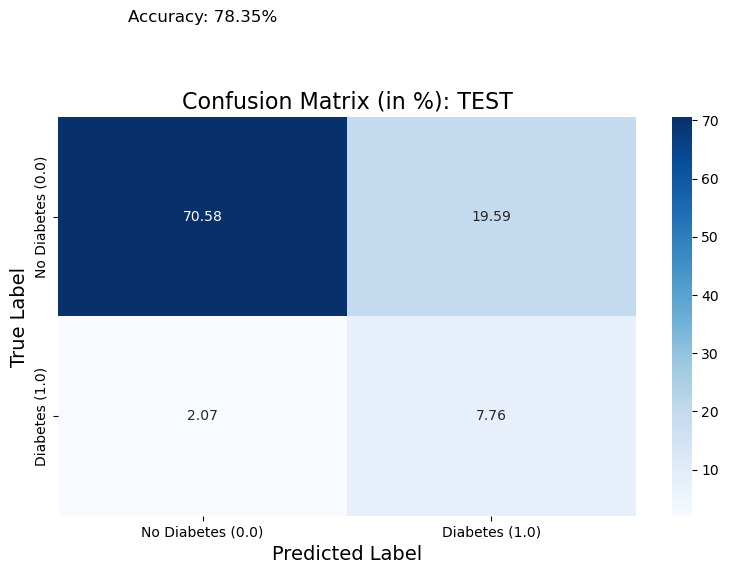

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_test_pred_2017 = model.predict(X_test_2017)

# Calculate confusion matrix and normalize it to percentages
cm_values = confusion_matrix(y_test_2017, y_test_pred_2017) / X_test_2017.shape[0] * 100

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'], 
            yticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Set plot labels and title
plt.title('Confusion Matrix (in %): TEST', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the accuracy as a percentage
accuracy = (cm_values[0, 0] + cm_values[1, 1])
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}%', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()

Use LightGBM classifier to gain better performance. Again test on validation, testing, and 2017 test dataset. Create reports for each dataset and a confusion matrix for both the test and 2017 test dataset.

In [9]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(
    n_estimators=2000,      # Number of trees (boosting rounds)
    learning_rate=0.005,     # Learning rate
    is_unbalance=True,      # Set to True if your data is imbalanced
    num_leaves=31,          # Maximum number of leaves in one tree
    max_depth=-1,            # Unlimited tree depth
)

# Train the model on the training data
lgb_clf.fit(X_train, y_train)


# Make predictions
y_train_pred = lgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = lgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = lgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = lgb_clf.predict(X_test_2017)

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

y_pred_probs = lgb_clf.predict_proba(X_test_2017)[:, 1]
threshold = 0.35
y_pred_custom = (y_pred_probs >= threshold).astype(int)  # Apply custom threshold
print("TEST 2017 with custom threshold of ", threshold)
print(confusion_matrix(y_test_2017, y_pred_custom))
print(classification_report(y_test_2017, y_pred_custom))

[LightGBM] [Info] Number of positive: 23146, number of negative: 23262
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7392
[LightGBM] [Info] Number of data points in the train set: 46408, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498750 -> initscore=-0.004999
[LightGBM] [Info] Start training from score -0.004999
Train
Accuracy: 0.9537579727633166
Confusion Matrix:
 [[22924   338]
 [ 1808 21338]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     23262
         1.0       0.98      0.92      0.95     23146

    accuracy                           0.95     46408
   macro avg       0.96      0.95      0.95     46408
weighted avg       0.96      0.95      0.95     46408

VAL
Ac

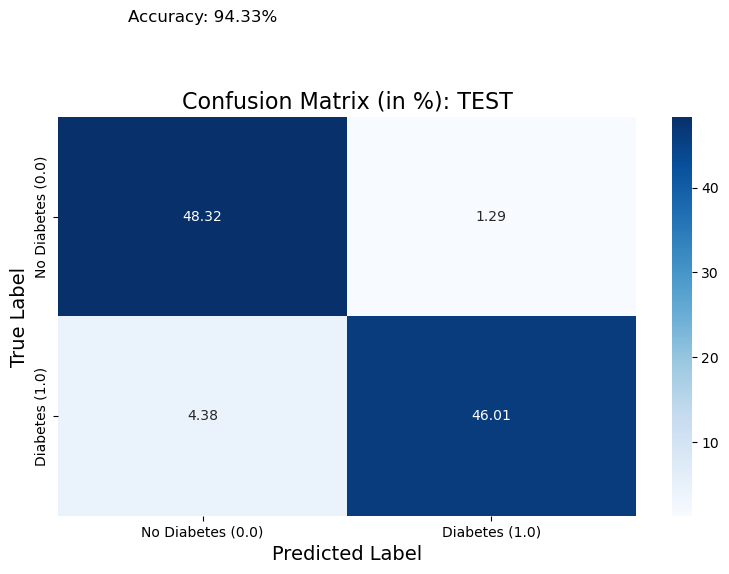

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


y_test_pred = lgb_clf.predict(X_test)

# Calculate confusion matrix and normalize it to percentages
cm_values = confusion_matrix(y_test, y_test_pred) / y_test.shape[0] * 100

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'], 
            yticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Set plot labels and title
plt.title('Confusion Matrix (in %): TEST', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the accuracy as a percentage
accuracy = (cm_values[0, 0] + cm_values[1, 1])
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}%', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.savefig("confusion_matrix_test2016")
plt.show()


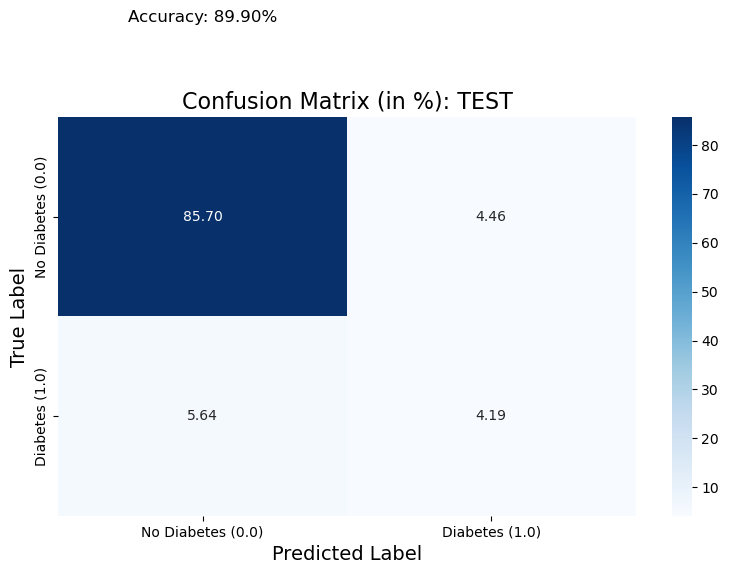

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_probs = lgb_clf.predict_proba(X_test_2017)[:, 1]
threshold = 0.35
y_pred_custom = (y_pred_probs >= threshold).astype(int)  # Apply custom threshold

# Calculate confusion matrix and normalize it to percentages
cm_values = confusion_matrix(y_test_2017, y_pred_custom) / y_test_2017.shape[0] * 100

# Create the confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm_values, annot=True, fmt='.2f', cmap='Blues', 
            xticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'], 
            yticklabels=['No Diabetes (0.0)', 'Diabetes (1.0)'])

# Set plot labels and title
plt.title('Confusion Matrix (in %): TEST', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

# Display the accuracy as a percentage
accuracy = (cm_values[0, 0] + cm_values[1, 1])
plt.text(0.5, -0.5, f'Accuracy: {accuracy:.2f}%', fontsize=12, ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.savefig("confusion_matrix_2017")
plt.show()

Explore underlying data structure of 2017 test dataset misclassified data points and 2016 test dataset misclassified data points using PCA.

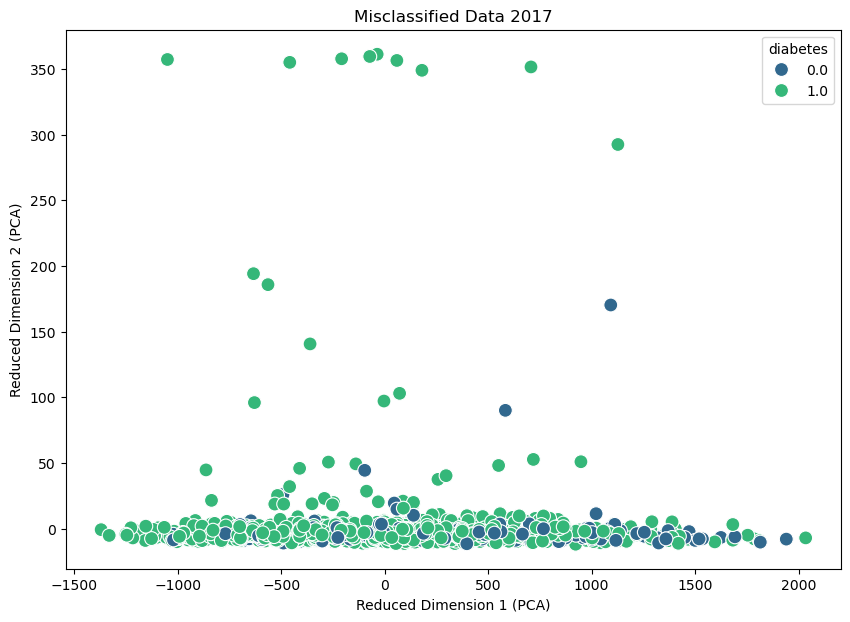

In [12]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test_2017 contains the actual labels and y_pred_2017 the predicted ones
# Step 1: Identify misclassified samples
misclassified_indices = np.where(y_test_2017 != y_pred_2017)[0]

# Extract the misclassified data
X_misclassified = X_test_2017.iloc[misclassified_indices]

# Step 2: Perform dimensionality reduction for visualization
# You can use PCA or TSNE to reduce to 2 or 3 dimensions for visualization
pca = PCA(n_components=2)  # Use PCA to reduce the dataset to 2 dimensions
X_pca = pca.fit_transform(X_misclassified)

# Step 3: Plot the actual labels for the misclassified samples
# Extract the actual labels for misclassified samples
actual_labels_misclassified = y_test_2017.iloc[misclassified_indices]

# Plot using the actual labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=actual_labels_misclassified, palette='viridis', s=100)

# Update axis labels to be more specific
plt.title('Misclassified Data 2017')
plt.xlabel('Reduced Dimension 1 (PCA)')
plt.ylabel('Reduced Dimension 2 (PCA)')
plt.show()


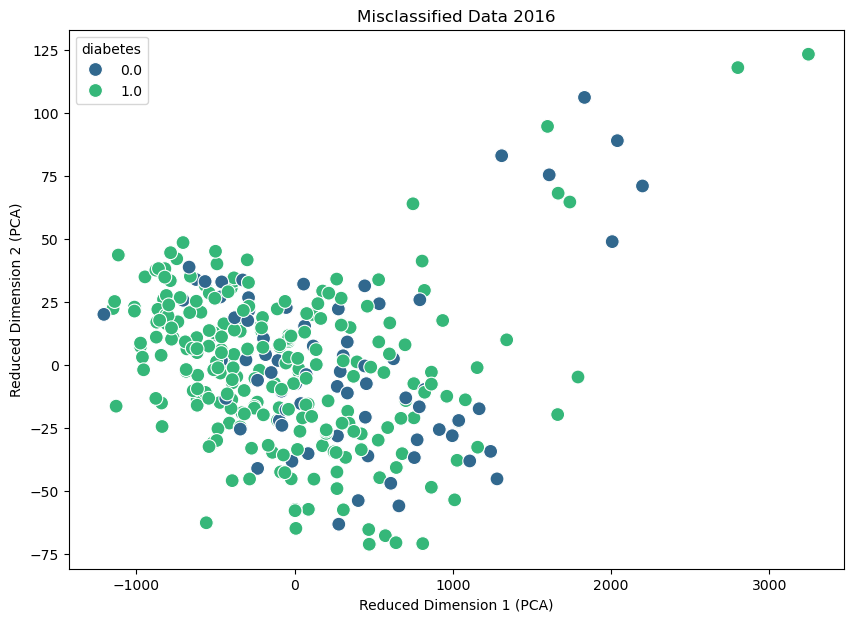

In [13]:
# Step 1: Identify misclassified samples
misclassified_indices = np.where(y_test != y_test_pred)[0]

# Extract the misclassified data
X_misclassified = X_test.iloc[misclassified_indices]

X_pca = pca.fit_transform(X_misclassified)

actual_labels_misclassified = y_test.iloc[misclassified_indices]

# Plot using the actual labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=actual_labels_misclassified, palette='viridis', s=100)

# Update axis labels to be more specific
plt.title('Misclassified Data 2016')
plt.xlabel('Reduced Dimension 1 (PCA)')
plt.ylabel('Reduced Dimension 2 (PCA)')
plt.show()

Explore the structure of the 2017 dataset and the 2016 training dataset using PCA.

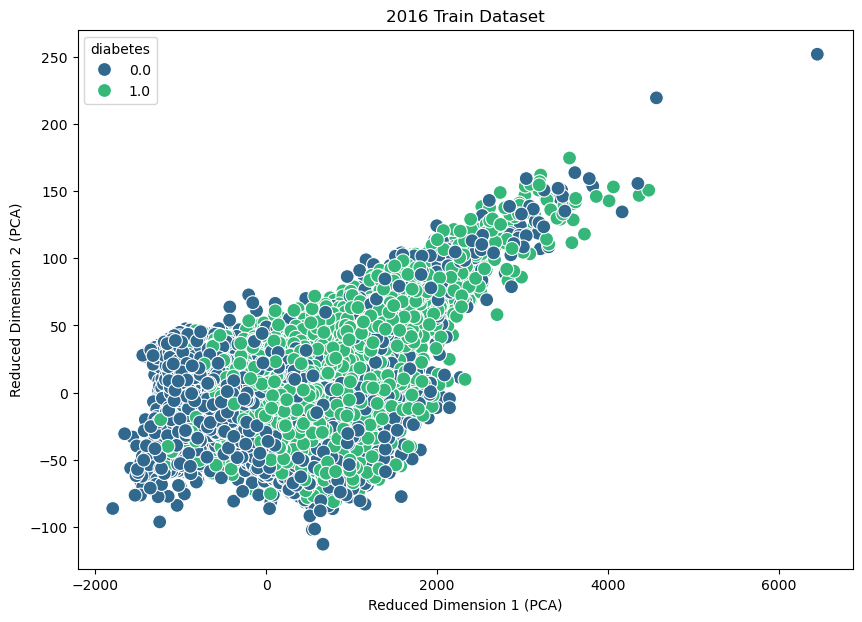

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Plot using the actual labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_train, palette='viridis', s=100)


# Update axis labels to be more specific
plt.title('2016 Train Dataset')
plt.xlabel('Reduced Dimension 1 (PCA)')
plt.ylabel('Reduced Dimension 2 (PCA)')
plt.show()

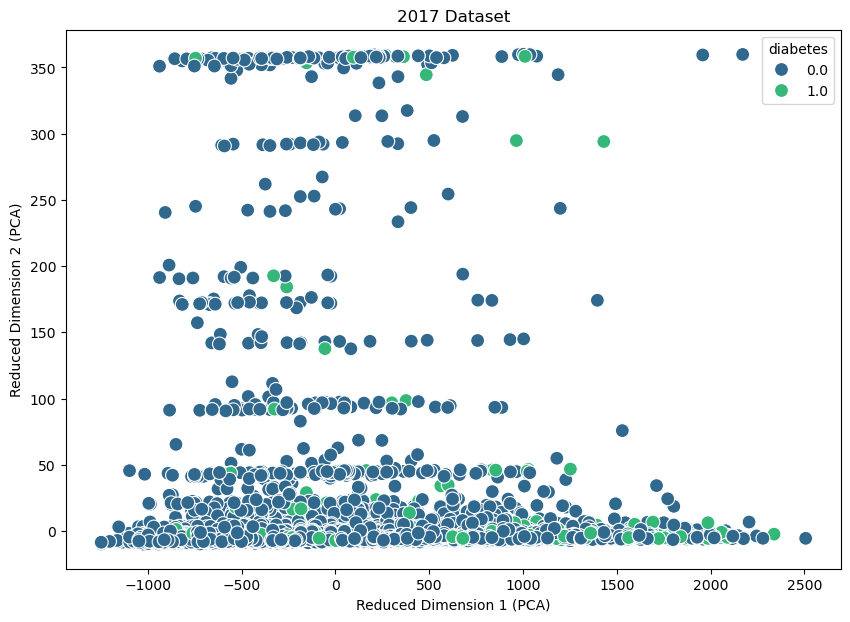

In [15]:
X_pca = pca.fit_transform(X_test_2017)

# Plot using the actual labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_test_2017, palette='viridis', s=100)


# Update axis labels to be more specific
plt.title('2017 Dataset')
plt.xlabel('Reduced Dimension 1 (PCA)')
plt.ylabel('Reduced Dimension 2 (PCA)')
plt.show()

Develop risk factor using the LGBM model.

In [16]:
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the positive class (1)
y_pred_prob = lgb_clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Add the risk factor to the test dataset (optional: combine X_test with risk scores)
risk_scores = pd.DataFrame({'Risk_Score': y_pred_prob}, index=X_test.index)
X_test_with_risk = pd.concat([X_test, risk_scores], axis=1)

# Example: Calculate and print the AUC score (optional performance evaluation)
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.4f}")

# Display the first few rows with risk scores
print(X_test_with_risk.head())


AUC Score: 0.9853
         age    smoker       sex  coronary_heart_disease      weight  \
0  78.892425  1.000000  0.000000                0.000000  177.151500   
1  57.769507  1.000000  0.439793                0.000000  199.607234   
2  84.601931  1.000000  0.988292                0.988292  111.346410   
3  44.000000  1.000000  1.000000                0.000000  107.000000   
4  37.220273  0.954805  0.954805                0.000000  241.960508   

           bmi     height  hypertension  heart_condition    cancer  \
0  2711.777887  67.661362      0.446213         0.446213  0.446213   
1  2990.204658  68.481653      0.000000         0.000000  0.560207   
2  2028.519867  62.070247      1.000000         0.988292  0.988292   
3  1834.000000  64.000000      0.000000         0.000000  0.000000   
4  4532.212338  61.361562      0.954805         0.000000  0.954805   

   family_history_diabetes  doctor_recommend_exercise  \
0                 0.553787                   0.553787   
1             

Top 5 highest at risk survey participants for diabetes that did not indicate having diabetes.

In [17]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Exclude rows where y_test (Target column) equals 1
filtered_data = X_test_with_risk[y_test != 1]

#get the highest patients at risk
top_risk_factors =filtered_data.sort_values(by='Risk_Score', ascending=False)

top_risk_factors.head()

,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,region,marital_status,stroke,told_reduce_fat,weight_loss_program,hours_sleep,blood_sugar,race,angina_pectoris,heart_attack,kidney_weak,functional_limits,arthritis,cannot_afford_medication,Risk_Score
3955,68.0,0.0,1.0,1.0,194.0,3916.0,59.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,4.2,2.0,1.0,0.0,1.0,0.0,8.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.850201
1479,72.0,0.0,1.0,1.0,205.0,3749.0,62.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,73.4,2.0,4.0,0.0,1.0,0.0,10.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.828968
5192,66.0,0.0,0.0,0.0,255.0,4119.0,66.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0,3.0,5.0,0.0,1.0,0.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.821602
5092,58.0,1.0,1.0,1.0,198.0,3197.0,66.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,10.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.810817
3434,78.0,0.0,0.0,0.0,171.4,4735.0,65.6,1.0,1.0,1.0,1.0,0.0,1.0,6.0,15.0,3.0,5.0,0.0,1.0,0.0,7.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.793571
